In [7]:
import pandas as pd, numpy as np
np.set_printoptions(suppress=True)# 关掉科学计数法
import glob
import os
import csv
# 一次性merge多个pct_chg
from functools import reduce
from datetime import datetime, timedelta

# import yfinance as yf
import tushare as ts
import time, urllib
ts.set_token('8ef5ec61cdd848715c57c11d58dd71da1271f76b2420d2bac8aef123')
pro = ts.pro_api("8ef5ec61cdd848715c57c11d58dd71da1271f76b2420d2bac8aef123")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

from plotly.graph_objs import Scatter,Layout
import plotly
import plotly.offline as py
import numpy as np
import plotly.graph_objs as go

#setting offilne
plotly.offline.init_notebook_mode(connected=True)

In [54]:
def get_mkt_data_df(path, ticker_list, date_col):
    # e.g. ch_db_path = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/CH_database/"
    csv_path = path+"*.csv"
    files = glob.glob(csv_path)
    ticker_df_list = []
    for ticker in ticker_list:
        try:
            ticker_df = pd.read_csv(path+ticker+".csv")
            ticker_df = ticker_df.sort_values(date_col)
#             ticker_df = ticker_df[ticker_df['date']>'2016-01-01']
            ticker_df_list.append(ticker_df) 
        except Exception as e:
            print(e)
    try:
        tickers_data_concated = pd.concat(ticker_df_list)
        tickers_data_concated.reset_index(inplace=True)
        del tickers_data_concated['index']  
    except Exception as e:
        print(e)
    return tickers_data_concated

In [41]:
au9999 = ts.pro_bar(ts_code="AU.SHF", asset="FT")# FT represents futures data type
au9999['date'] = pd.to_datetime(au9999['trade_date']).astype(str)
au9999.sort_values('date', inplace=True)

In [55]:
gold_etf = get_mkt_data_df("/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/CH_database/", ['518880'],'date')

In [57]:
gold_etf['pct_chg'] = gold_etf['close'].pct_change()
gold_etf.dropna(inplace=True)

/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/pandas/compat/_optional.py:106: UserWarning:

Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).



In [59]:
gold_etf.head()

,date,open,close,high,low,volume,code,pct_chg
1,2013-07-30,2.632,2.646,2.648,2.632,929931.0,518880,0.007616
2,2013-07-31,2.643,2.657,2.659,2.640,699761.0,518880,0.004157
3,2013-08-01,2.653,2.643,2.656,2.635,300064.0,518880,-0.005269
4,2013-08-02,2.630,2.578,2.632,2.558,330218.0,518880,-0.024593
5,2013-08-05,2.621,2.630,2.642,2.621,240120.0,518880,0.020171


In [60]:
au9999['pct_chg'] = au9999['close'].pct_change()

,ts_code,trade_date,pre_close,pre_settle,open,high,low,close,settle,change1,change2,vol,amount,oi,oi_chg,date,pct_chg


In [63]:
merged = au9999.merge(gold_etf, on ='date')

In [69]:
merged['au9999_cum_pct'] = merged['pct_chg_x'].cumsum()+1

In [71]:
merged['518880_cum_pct'] = merged['pct_chg_y'].cumsum()+1

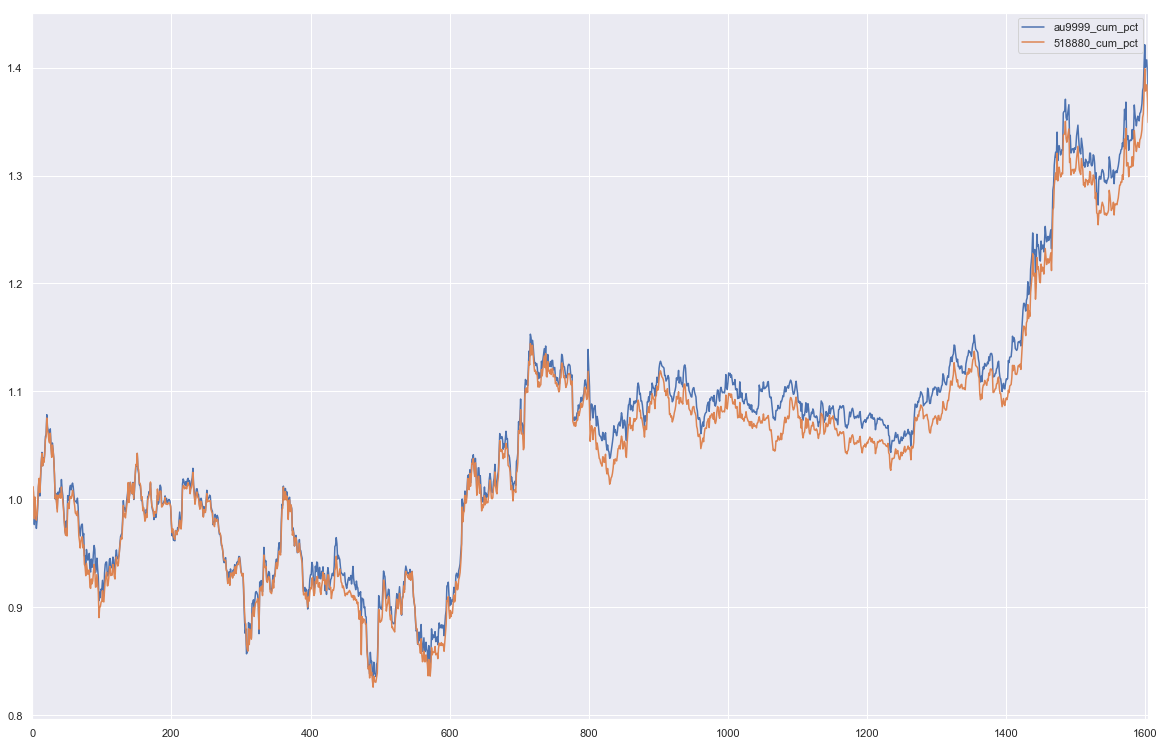

In [76]:
merged[['au9999_cum_pct', '518880_cum_pct']].plot(figsize = (20,13))

In [79]:
print("Correlations between two assets' daily returns:")
merged['pct_chg_x'].corr(merged['pct_chg_y'])

Correlations between two assets' daily returns:


0.9625241477796731